In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

products_df = pd.read_csv("../data/products.csv")
translations_df = pd.read_csv("../data/product_category_name_translation.csv")
order_items_df = pd.read_csv('../data/order_items.csv')

In [68]:
merged_df = pd.merge(products_df, translations_df, how='left', on='product_category_name')
merged_df = merged_df[['product_id', 'product_category_name', 'product_category_name_english']]
merged_df.head()

,product_id,product_category_name,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,housewares


In [69]:
merged_df = pd.merge(order_items_df, merged_df, on='product_id', how='left')

columns_to_drop = ['shipping_limit_date', 'freight_value', 'order_item_id', 'seller_id']
merged_df.drop(columns=columns_to_drop, inplace=True)
print(len(merged_df['order_id']))

merged_df.head()

112650


,order_id,product_id,price,product_category_name,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,cool_stuff,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,pet_shop,pet_shop
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,moveis_decoracao,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,perfumaria,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,ferramentas_jardim,garden_tools


In [70]:
categories = []
quantities = []
products = []
volumes = []

grouped = merged_df.groupby('product_category_name_english')

for category, group in grouped:

    top_product = group['product_id'].value_counts().idxmax()
    
    top_product_info = group[group['product_id'] == top_product].iloc[0]
    
    quantity_by_price = group[group['product_id'] == top_product]['price'].count()
    volume_price_by_quantity = group[group['product_id'] == top_product]['price'].sum()  # Обчислюємо суму цін
    
    categories.append(category)
    quantities.append(quantity_by_price)
    products.append(top_product)
    volumes.append(volume_price_by_quantity)

result_df = pd.DataFrame({
    'product_category_name_english': categories,
    'quantity_by_price': quantities,
    'product_id_by_quantity': products,
    'volume_price_by_quantity': volumes
})

total_volume_df = merged_df.groupby('product_category_name_english')['price'].sum().reset_index()
total_volume_df.rename(columns={'price': 'total_volume_category'}, inplace=True)

result_df_final = pd.merge(result_df, total_volume_df, on='product_category_name_english', how='left')

result_df_final['percentage_of_total_volume_by_quantity'] = (result_df_final['volume_price_by_quantity'] * 100) / result_df_final['total_volume_category']

total_volume_sum = result_df_final['total_volume_category'].sum()

result_df_final['percentage_of_total_volume_by_category'] = (result_df_final['total_volume_category'] * 100) / total_volume_sum

result_df_final_sorted = result_df_final.sort_values(by='total_volume_category', ascending=False)
result_df_final_sorted.head()

,product_category_name_english,quantity_by_price,product_id_by_quantity,volume_price_by_quantity,total_volume_category,percentage_of_total_volume_by_quantity,percentage_of_total_volume_by_category
43,health_beauty,281,154e7e31ebfa092203795c972e5804a6,6325.19,1258681.34,0.502525,9.388524
70,watches_gifts,323,53b36df67ebb7c41585e8d54d6772e08,37683.42,1205005.68,3.127240,8.988157
7,bed_bath_table,488,99a4788cb24856965c36a24e339b6058,43025.56,1036988.68,4.149087,7.734915
65,sports_leisure,94,c6336fa91fbd87c359e44f5dca5a90ed,4111.20,988048.97,0.416093,7.369873
15,computers_accessories,343,d1c427060a0f73f6b889a5c7c61f2ac4,47214.51,911954.32,5.177289,6.802282


In [71]:
result_df_final_sorted = result_df_final.sort_values(by='total_volume_category', ascending=False)

result_df_final_sorted.head()

,product_category_name_english,quantity_by_price,product_id_by_quantity,volume_price_by_quantity,total_volume_category,percentage_of_total_volume_by_quantity,percentage_of_total_volume_by_category
43,health_beauty,281,154e7e31ebfa092203795c972e5804a6,6325.19,1258681.34,0.502525,9.388524
70,watches_gifts,323,53b36df67ebb7c41585e8d54d6772e08,37683.42,1205005.68,3.127240,8.988157
7,bed_bath_table,488,99a4788cb24856965c36a24e339b6058,43025.56,1036988.68,4.149087,7.734915
65,sports_leisure,94,c6336fa91fbd87c359e44f5dca5a90ed,4111.20,988048.97,0.416093,7.369873
15,computers_accessories,343,d1c427060a0f73f6b889a5c7c61f2ac4,47214.51,911954.32,5.177289,6.802282


In [72]:
larger_window_size = 14

smoothed_data = result_df_final_sorted['percentage_of_total_volume_by_quantity'].rolling(window=larger_window_size, min_periods=1).mean()

deviation_from_trend = result_df_final_sorted['percentage_of_total_volume_by_quantity'] - smoothed_data

result_df_final_sorted['deviation_from_trend'] = deviation_from_trend

high_deviation_rows = result_df_final_sorted[(result_df_final_sorted['deviation_from_trend'] > 15) | (result_df_final_sorted['deviation_from_trend'] < -15)]

file_path = 'new_data_task2/goods_analytics_by_category.csv'
result_df_final_sorted.to_csv(file_path, index=False)

file_path = 'new_data_task2/high_deviation.csv'
high_deviation_rows.to_csv(file_path, index=False)
high_deviation_rows.head(40)

,product_category_name_english,quantity_by_price,product_id_by_quantity,volume_price_by_quantity,total_volume_category,percentage_of_total_volume_by_quantity,percentage_of_total_volume_by_category,deviation_from_trend
14,computers,35,d6160fb7873f184099d9bc95e30376af,48899.34,222963.13,21.931581,1.663086,17.514938
47,home_confort,165,35afc973633aaeb6b877ff57b2793310,14484.89,58572.04,24.730042,0.436890,19.298253
64,small_appliances_home_oven_and_coffee,19,f49e985b4cb2d0543890d6dd00077663,14590.00,47445.71,30.750936,0.353898,21.979088
18,construction_tools_lights,56,a02d0123079f4ae96001ba2010d1a2df,13550.00,41080.00,32.984421,0.306416,21.167809
2,art,107,4fe644d766c7566dbc46fb851363cb3b,10803.72,24202.64,44.638601,0.180528,29.588293
67,tablets_printing_image,33,6bbe55cf8f85c87b6eebb775a53402f4,2523.56,7528.41,33.520491,0.056155,20.536802
41,furniture_mattress_and_upholstery,22,726b4e18f00255e2e63491bcba3f60b8,1860.00,4368.08,42.581638,0.032582,28.804301
3,arts_and_craftmanship,5,b9976e9c22fb1540bd71d1bcd2989475,641.45,1814.01,35.360886,0.013531,18.315738
46,home_comfort_2,26,ec5b3c8bb77ad22278f6e9d719a83de3,335.40,760.27,44.115906,0.005671,23.322017
11,cds_dvds_musicals,14,1dceebcc5f23c02ea23e16d5bedca000,730.00,730.00,100.000000,0.005445,74.457575


In [73]:
less50000_df = result_df_final[result_df_final['total_volume_category'] < 50000]
less50000_df = less50000_df.sort_values(by='total_volume_category', ascending=True)
print(len(less50000_df['total_volume_category']))
more50000_df = result_df_final[result_df_final['total_volume_category'] >= 50000]
more50000_df = more50000_df.sort_values(by='total_volume_category', ascending=True)
print(len(more50000_df['total_volume_category']))
more50000_df.head()

37
34


,product_category_name_english,quantity_by_price,product_id_by_quantity,volume_price_by_quantity,total_volume_category,percentage_of_total_volume_by_quantity,percentage_of_total_volume_by_category
4,audio,48,db5efde3ad0cc579b130d71c4b2db522,9425.78,50688.50,18.595500,0.378086
1,air_conditioning,17,98e91d0f32954dcd8505875bb2b42cdb,1019.40,55024.96,1.852614,0.410432
47,home_confort,165,35afc973633aaeb6b877ff57b2793310,14484.89,58572.04,24.730042,0.436890
34,fixed_telephony,18,913580fde3e72c3b3e4ce0b79963bee6,200.76,59583.00,0.336942,0.444431
40,furniture_living_room,42,2ff995aead9c63a1f37a07b3664ead37,3114.66,68916.56,4.519465,0.514050


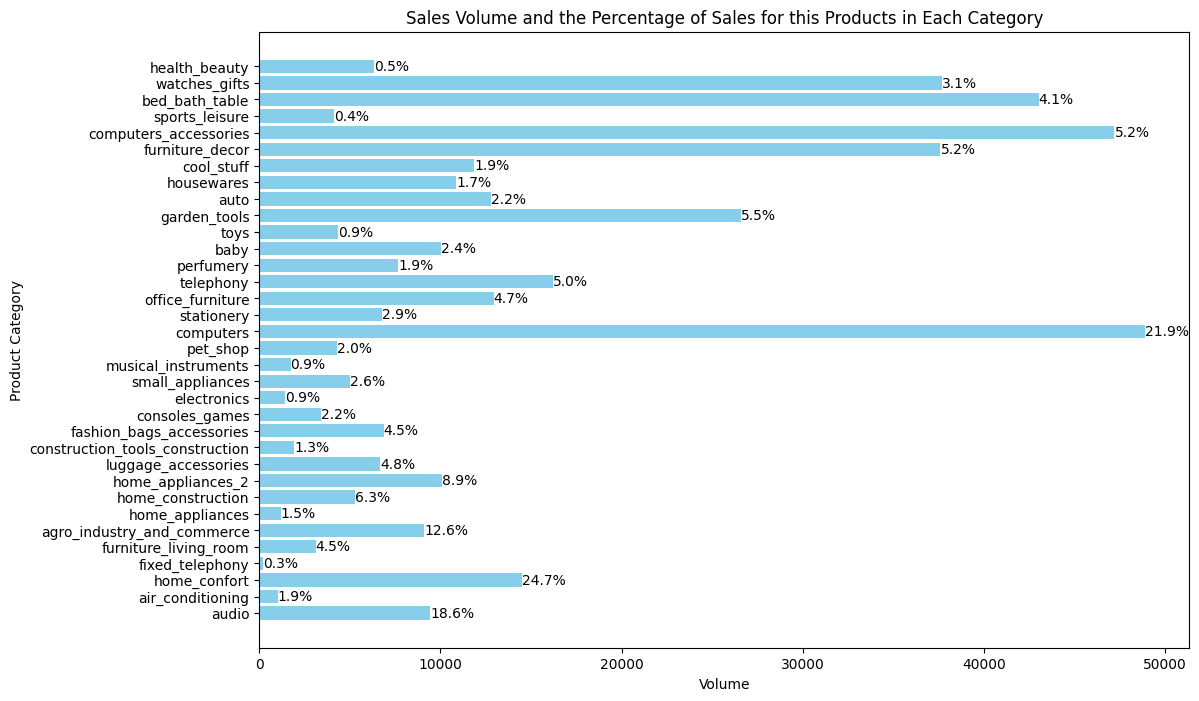

In [74]:
y_values = more50000_df['product_category_name_english']
x_values = more50000_df['volume_price_by_quantity']

plt.figure(figsize=(12, 8)) 
bars = plt.barh(y_values, x_values, color='skyblue') 

for bar, percentage in zip(bars, more50000_df['percentage_of_total_volume_by_quantity']):
    yval = bar.get_y() + bar.get_height() / 2  
    plt.text(bar.get_width(), yval, f'{round(percentage, 1)}%', va='center', ha='left', color='black', fontsize=10)

plt.xlabel('Volume')  
plt.ylabel('Product Category') 
plt.title('Sales Volume and the Percentage of Sales for this Products in Each Category') 

plt.savefig('new_data_task2/Sales_Volume_in_Each_Category_more50000.png', bbox_inches='tight')

plt.show()

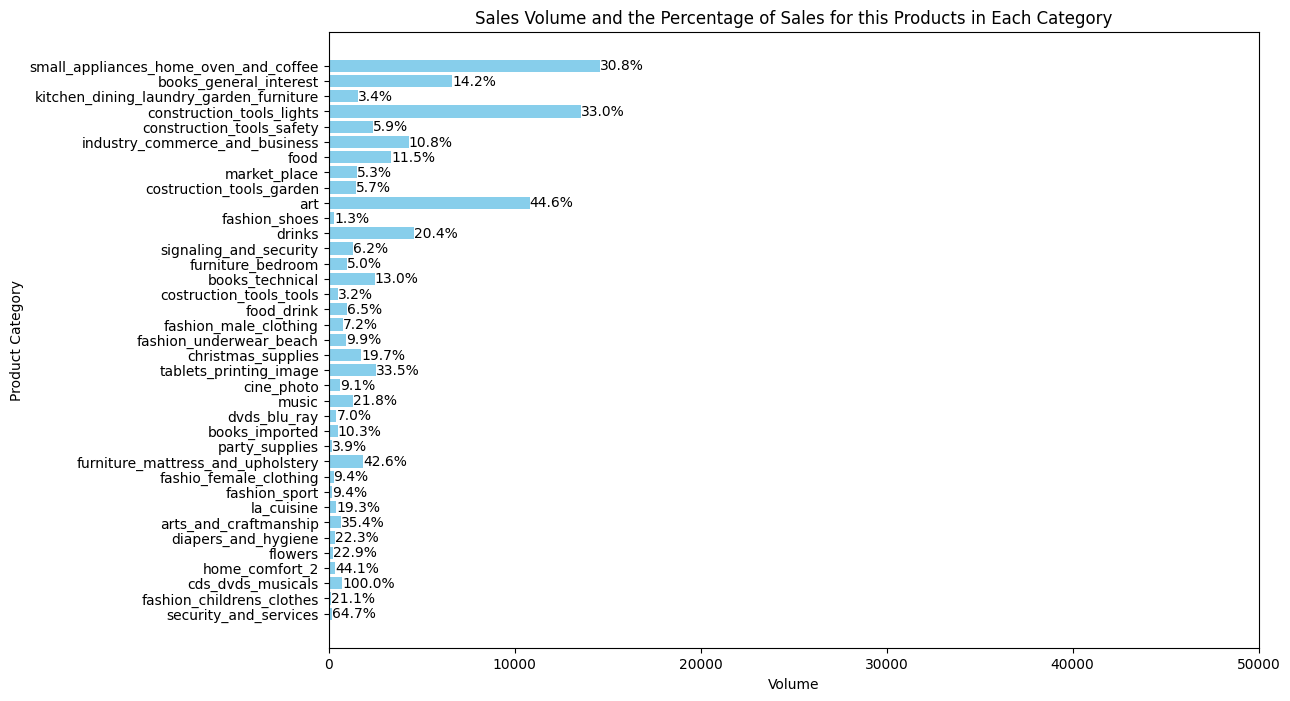

In [75]:
y_values = less50000_df['product_category_name_english']
x_values = less50000_df['volume_price_by_quantity']

plt.figure(figsize=(12, 8)) 
bars = plt.barh(y_values, x_values, color='skyblue') 

for bar, percentage in zip(bars, less50000_df['percentage_of_total_volume_by_quantity']):
    yval = bar.get_y() + bar.get_height() / 2  
    plt.text(bar.get_width(), yval, f'{round(percentage, 1)}%', va='center', ha='left', color='black', fontsize=10)

plt.xlabel('Volume')  
plt.ylabel('Product Category') 
plt.title('Sales Volume and the Percentage of Sales for this Products in Each Category') 
plt.xlim(0, 50000)

plt.savefig('new_data_task2/Top_10_Sellers_with_Lowest_Ratings_less50000.png', bbox_inches='tight')

plt.show()

In [76]:
more50000_df.head()

,product_category_name_english,quantity_by_price,product_id_by_quantity,volume_price_by_quantity,total_volume_category,percentage_of_total_volume_by_quantity,percentage_of_total_volume_by_category
4,audio,48,db5efde3ad0cc579b130d71c4b2db522,9425.78,50688.50,18.595500,0.378086
1,air_conditioning,17,98e91d0f32954dcd8505875bb2b42cdb,1019.40,55024.96,1.852614,0.410432
47,home_confort,165,35afc973633aaeb6b877ff57b2793310,14484.89,58572.04,24.730042,0.436890
34,fixed_telephony,18,913580fde3e72c3b3e4ce0b79963bee6,200.76,59583.00,0.336942,0.444431
40,furniture_living_room,42,2ff995aead9c63a1f37a07b3664ead37,3114.66,68916.56,4.519465,0.514050


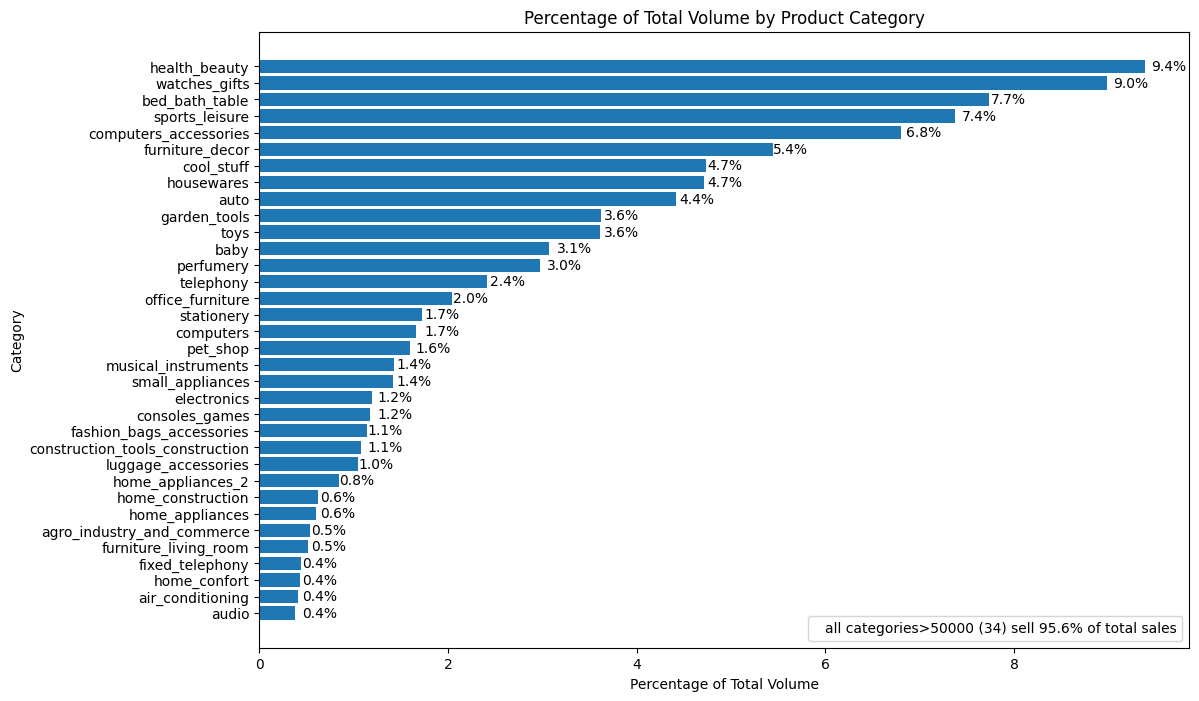

In [77]:
total_percentage = more50000_df['percentage_of_total_volume_by_category'].sum()

plt.figure(figsize=(12, 8)) 

bars = plt.barh(more50000_df['product_category_name_english'], 
                more50000_df['percentage_of_total_volume_by_category'])

plt.xlabel('Percentage of Total Volume') 
plt.ylabel('Category')  
plt.title('Percentage of Total Volume by Product Category') 

for bar in bars:
    width = round(bar.get_width(), 1) 
    plt.text(width + 0.05, bar.get_y() + bar.get_height()/2, f'{width:.1f}%', 
                va='center', ha='left') 
    
plt.legend([f'all categories>50000 (34) sell {total_percentage:.1f}% of total sales'], loc='lower right', bbox_to_anchor=(1, 0), handlelength=0)

plt.savefig('new_data_task2/Percentage_of_Total_Volume_by_Product_Category.png', bbox_inches='tight')

plt.show()